<a href="https://colab.research.google.com/github/shadowscythe03/es335-24-fall-assignment-2/blob/master/task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torchvision
import os
import requests
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

torch.Size([3, 1280, 852])
torch.Size([1280, 852])


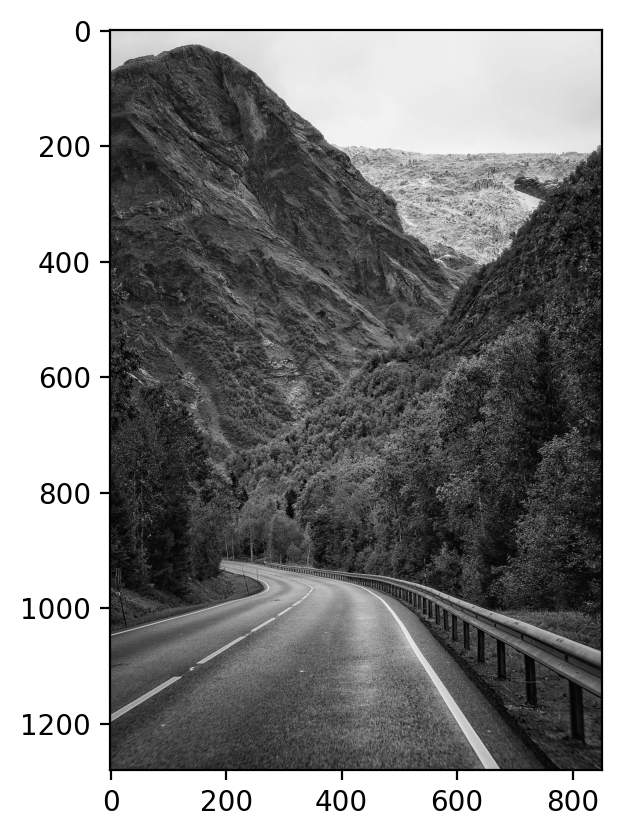

In [2]:
# if os.path.exists('dog.jpg'):
#     print('dog.jpg exists')
# else:
#     url = 'https://segment-anything.com/assets/gallery/AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg'
#     response = requests.get(url)
#     if response.status_code == 200:
#         with open('dog.jpg', 'wb') as file:
#             file.write(response.content)
#         print('dog.jpg downloaded successfully')
#     else:
#         print('Failed to download dog.jpg')

img = torchvision.io.read_image('road-8284023_1280.jpg')
print(img.shape)
img = img.clone().detach().float()
# print(img.shape)
img = img.mean(dim=0, keepdim=False)
print(img.shape)

plt.imshow(img, cmap='gray')

torch.Size([300, 300])


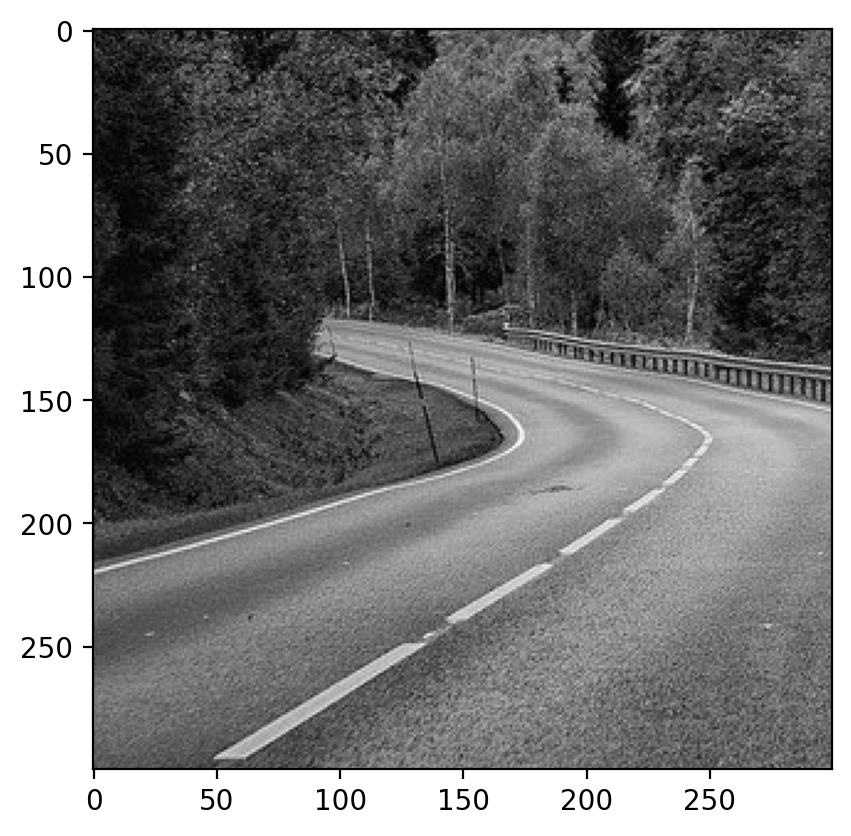

In [25]:
crop = torchvision.transforms.functional.crop(img, 800, 100, 300, 300)
print(crop.shape)
plt.imshow(crop, cmap='gray')

tensor(26885)


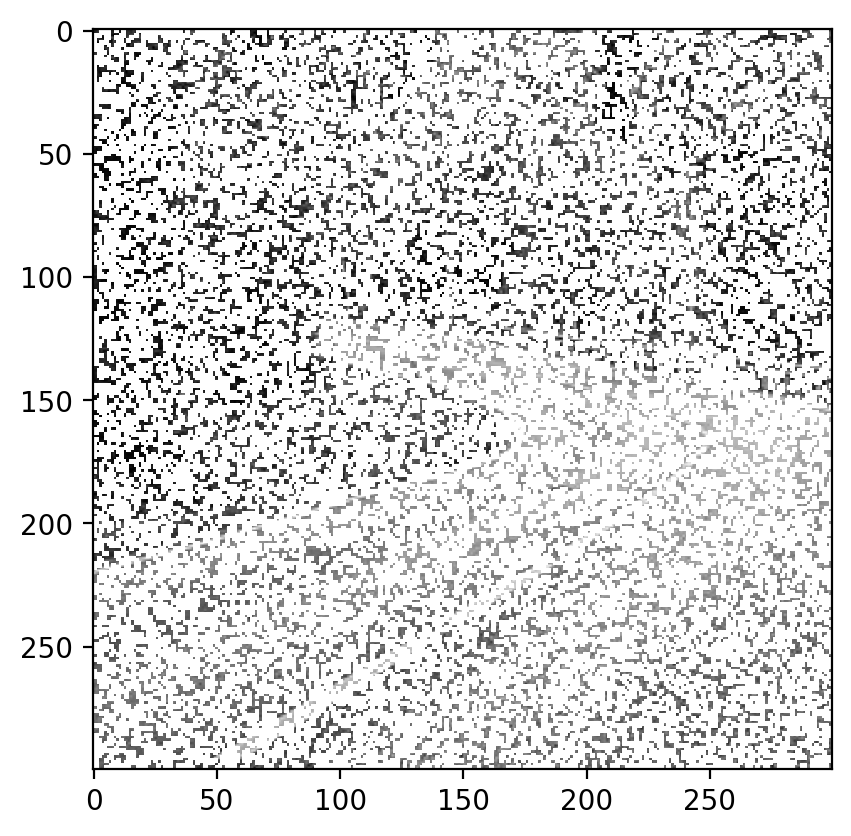

In [26]:
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
def mask_image(img, prop):
    img_copy = img.clone()
    mask = torch.rand(img.shape) < prop
    img_copy[mask] = float('nan')
    return img_copy, mask

masked_image, mask = mask_image(crop, 0.3)
print(mask.sum())
plt.imshow(masked_image, cmap='gray')

In [42]:
# def factorize(A, k, device=torch.device("cpu")):
#     """Factorize the matrix A into W and H
#     A: input matrix of size (n_users, n_movies)
#     k: number of latent features

#     Returns W and H
#     W: matrix of size (n_users, k)
#     H: matrix of size (k, n_movies)
#     """
#     A = A.to(device)
#     # Randomly initialize W and H
#     W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
#     H = torch.randn(k, A.shape[1], requires_grad=True, device=device)

#     # Optimizer
#     optimizer = optim.Adam([W, H], lr=0.01)

#     # Train the model
#     for i in range(1000):
#         # Compute the loss
#         loss = torch.norm(torch.mm(W, H) - A)

#         # Zero the gradients
#         optimizer.zero_grad()

#         # Backpropagate
#         loss.backward()

#         # Update the parameters
#         optimizer.step()

#     return W, H, loss

def factorize(A, k, device=torch.device("cpu"), epsilon = 0.001):
    """Factorize the matrix D into A and B"""
    A = A.to(device)
    # Randomly initialize A and B
    W = torch.randn(A.shape[0], k, requires_grad=True, device=device)
    H = torch.randn(k, A.shape[1], requires_grad=True, device=device)
    # Optimizer
    optimizer = optim.Adam([W, H], lr=0.01)
    mask = ~torch.isnan(A)
    epoch = 0
    # Train the model
    while True:
        # Compute the loss
        diff_matrix = torch.mm(W, H) - A
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)

        # Zero the gradients
        optimizer.zero_grad()

        # Backpropagate
        loss.backward()

        # Update the parameters
        optimizer.step()
        epoch += 1
        if epoch>1:
            if prev_loss-loss < epsilon:
                break
        if epoch>=100 and epoch%100==0:
            print(f'Epoch:{epoch}--->Loss:{loss}, prev_loss:{prev_loss}')
        prev_loss = loss

    print(f'No of Epochs:{epoch}')

    return W, H, loss

W, H, loss = factorize(masked_image, 50, device=device)

Epoch:100--->Loss:11694.197265625, prev_loss:11895.4638671875
Epoch:200--->Loss:7869.66015625, prev_loss:7878.75146484375
Epoch:300--->Loss:6496.416015625, prev_loss:6510.33203125
Epoch:400--->Loss:5446.93359375, prev_loss:5454.6923828125
Epoch:500--->Loss:4787.34375, prev_loss:4793.11376953125
Epoch:600--->Loss:4278.6923828125, prev_loss:4283.11474609375
Epoch:700--->Loss:3903.923828125, prev_loss:3907.031005859375
Epoch:800--->Loss:3649.79541015625, prev_loss:3651.838134765625
Epoch:900--->Loss:3483.809326171875, prev_loss:3485.145263671875
Epoch:1000--->Loss:3374.21484375, prev_loss:3375.11181640625
Epoch:1100--->Loss:3300.03857421875, prev_loss:3300.651123046875
Epoch:1200--->Loss:3248.591552734375, prev_loss:3249.025146484375
Epoch:1300--->Loss:3211.72216796875, prev_loss:3212.037841796875
Epoch:1400--->Loss:3184.24658203125, prev_loss:3184.48779296875
Epoch:1500--->Loss:3162.916748046875, prev_loss:3163.107421875
Epoch:1600--->Loss:3145.666748046875, prev_loss:3145.822509765625
E

In [40]:
loss

tensor(3037.8149, grad_fn=<LinalgVectorNormBackward0>)

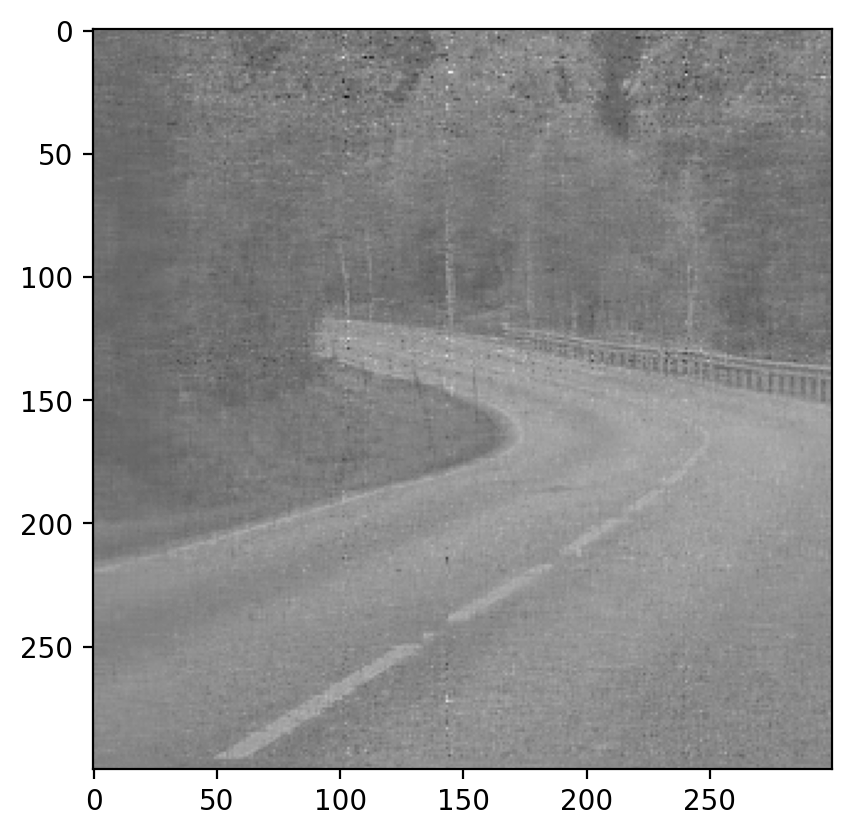

In [41]:
plt.imshow(torch.mm(W, H).cpu().detach().numpy(), cmap='gray')

Epoch:100--->Loss:13058.453125, prev_loss:13276.8544921875
Epoch:200--->Loss:8924.169921875, prev_loss:8934.908203125
Epoch:300--->Loss:7400.5, prev_loss:7415.607421875
Epoch:400--->Loss:6337.703125, prev_loss:6344.97607421875
Epoch:500--->Loss:5702.58544921875, prev_loss:5708.41015625
Epoch:600--->Loss:5167.65283203125, prev_loss:5172.43701171875
Epoch:700--->Loss:4759.4033203125, prev_loss:4762.775390625
Epoch:800--->Loss:4489.08251953125, prev_loss:4491.19580078125
Epoch:900--->Loss:4322.2099609375, prev_loss:4323.51318359375
Epoch:1000--->Loss:4217.41064453125, prev_loss:4218.24560546875
Epoch:1100--->Loss:4149.064453125, prev_loss:4149.6171875
Epoch:1200--->Loss:4103.376953125, prev_loss:4103.7529296875
Epoch:1300--->Loss:4072.2734375, prev_loss:4072.53125
Epoch:1400--->Loss:4050.69287109375, prev_loss:4050.8720703125
Epoch:1500--->Loss:4035.360595703125, prev_loss:4035.49267578125
Epoch:1600--->Loss:4024.16650390625, prev_loss:4024.26318359375
Epoch:1700--->Loss:4015.789306640625

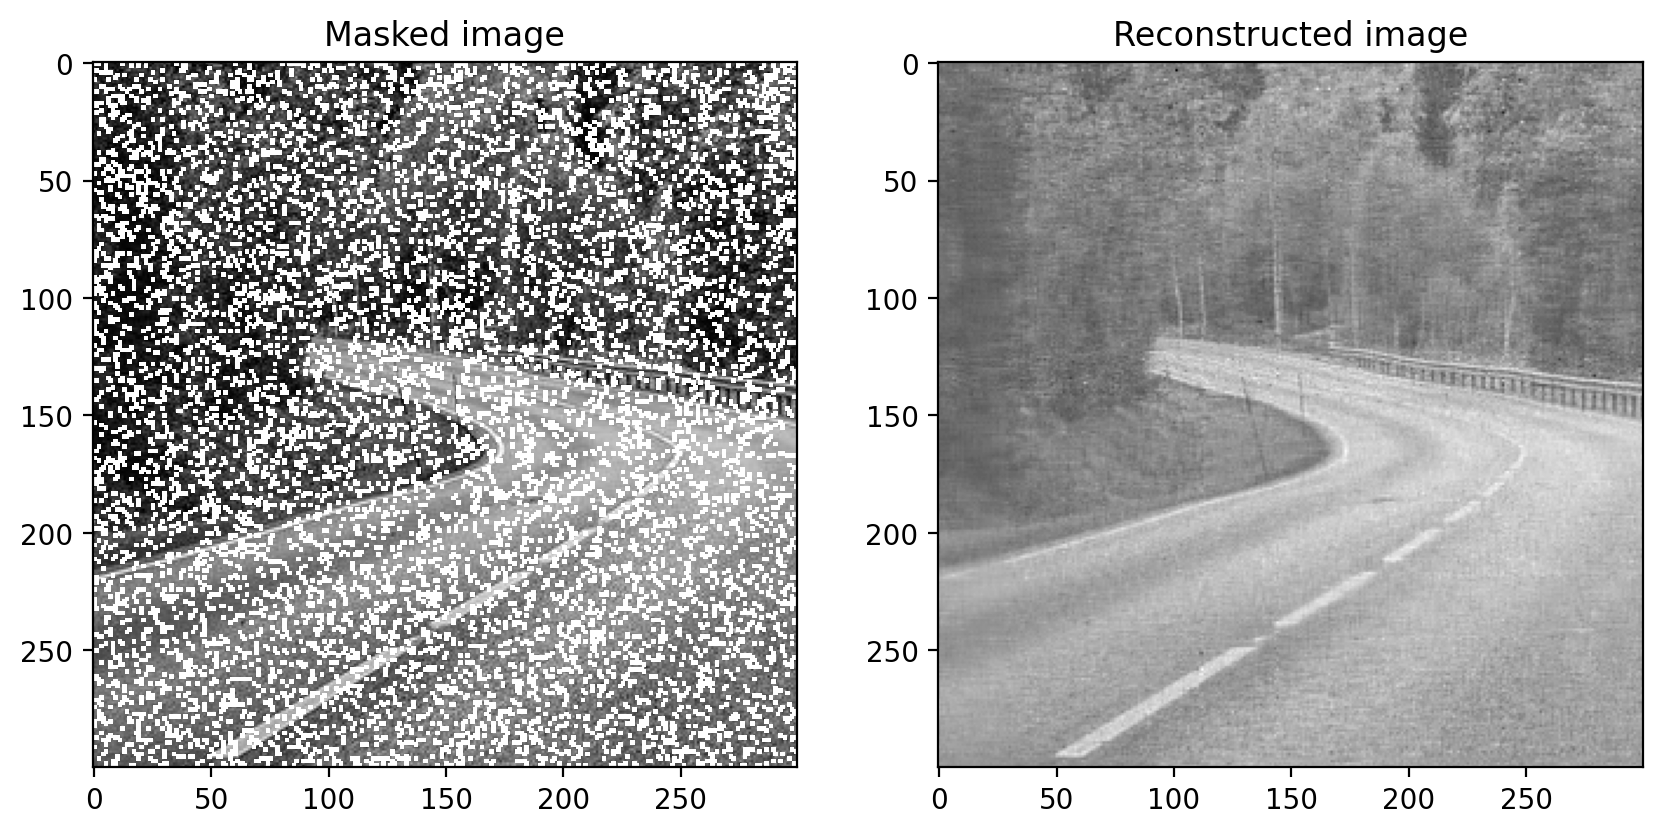

In [43]:
def plot_image_completion(prop=0.1, factors=50):
    masked_image, mask = mask_image(crop, prop)
    W, H, loss = factorize(masked_image, factors, device=device)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    reconstructed_img = torch.mm(W, H).cpu().detach().numpy()
    ax[0].imshow(masked_image, cmap='gray')
    ax[0].set_title("Masked image")
    ax[1].imshow(reconstructed_img, cmap='gray')
    ax[1].set_title("Reconstructed image")

plot_image_completion()